# Sistemas dinámicos 2


Vamos a continuar la plática de sistemsa dinámicos y atractores pero con el ejemplo específico de los autómatas celulares.

## Autómatas celulares

Ya habíamos dicho que son modelos de cómputo y que consisten en una malla $M$ dimensional en donde cada una de las entradas $c_i$ de la malla puede tomar $n$ posibles estados. Un ejemplo de estos sistemas dinámicos son los elementales que tienen vecindad de $k=1$ y los estados que pueden tomar son $\Sigma = \lbrace 0,1 \rbrace$

$$c^{t+1}_{r} = f(c^{t}_{r-k}, \ldots , c^{t}_{r}, \ldots, c^{t}_{r+k}) $$

In [21]:
import sys
from random import choice
from numpy import array, dot, zeros, hstack, ndarray
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt


Una referencia útil para entender autómatas celulares es Illachinsky o bien 
The Nature of code que se pued encontrar en la siguiente liga [NofC](https://natureofcode.com/book/chapter-7-cellular-automata/)

In [42]:

def regla(numero):
    """
    Crea una regla de un ACE a partir del número en el parámetro
    y regresa la cadena equivalente en binario a 8 bits.
    """
    binario = bin(numero)
    rtxt = '0'*7 + binario[2:]
    return rtxt[-8:]
def creamatriz(N,L):
    """
    Crea una matriz de (N,L)
    param N columnas
    param L filas
    """
    M = [[0]*N] *L
    return array(M)
def regla_idx(r, i):
    """
    Regresa la entrada i de la regla 
    """
    rr = ''.join(list(reversed(list(r))))
    n = int(i,2)
    return rr[n]
def itera_regla(regla, vector):
    L = len(vector)
    C = []
    R = []
    for j in range(L):
        contxt =  str(vector[(j-1)%L]) + str(vector[j]) + str( vector[(j+1)%10] )
        C.append(contxt)
    for c in  C:
        R.append( int(regla_idx( regla, c )) )
    return R

#Creamos una amtrix de 100 x 200 
N = 100
L = 200
M = creamatriz(N,L)
v = np.array([choice([0,1]) for i in range(N)])
print(v.shape)
M[0] = v
print(M.shape)
#aplicamos la regla 20 a lo largo de la matriz M con condicion inicial
#al azar
regla = regla(20)
for idx in range(1,len(M)):
    v = M[idx-1]
    vn = array( itera_regla( regla, v ) )
    M[idx] =vn


(100,)
(200, 100)


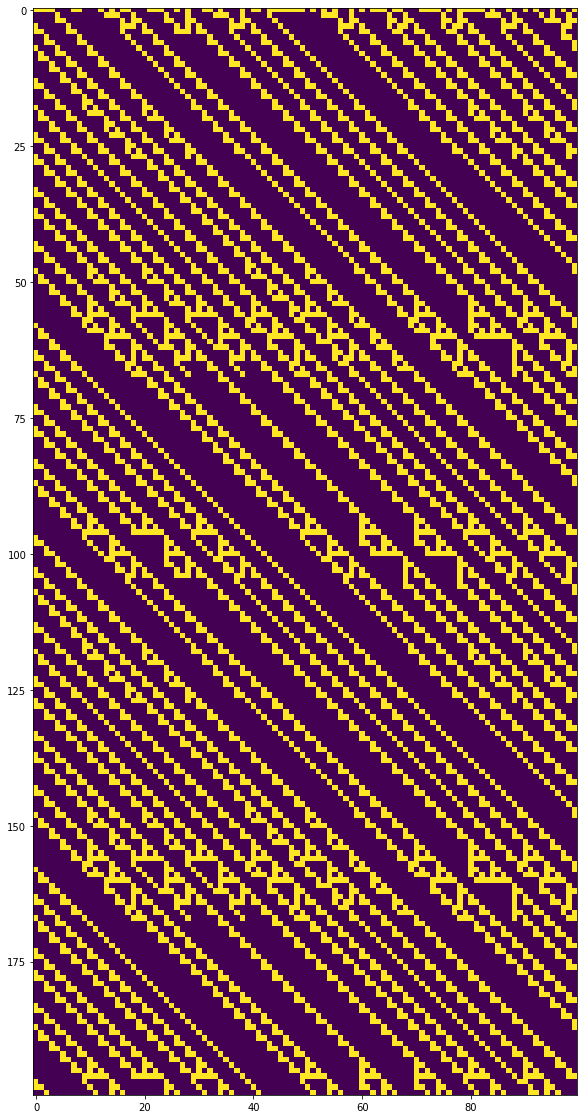

In [43]:
fig = plt.figure(figsize=(20,20))
plt.imshow(M)


Stephen Wolfram propuso una clasificación para estos 256 autómatas de los cuales los dividió en estas clases

Clase | Característica 
------|---------------
1     | Punto fijo
2     | Ciclo límite
3     | Azar 
4     | Complejos 

Que son una clasificación demasiado general pero esencialmente la primera indica que después de unas actualizaciones, las configuraciones alcanzadas son todas la misma. La segunda presenta configuraciones periódicas $(t \ge 2)$ y la tercer clase no parece mostrar una regularidad significativa. La 4a clase se hipotetiza que puede implementar cómputo universal y se sabe que la regla 110 es una de las reglas que pertenecen a esta clase.

A continuación puedes ver un arreglo con los 256 autómatas celulares posibles con una condición inicial al azar.
<img src="todos.png" width=75%>

Los autómatas celulares tienen muchas aplicaciones, particularmente dentro del cómputo numérico, simulación computacional aunque también existen aplicaciones dentro de la criptografía y procesamiento de imágenes.


## Redes booleanas aleatorias

Una de  las aplicaciones de los autómatas en la biología son las redes booleanas aleatorias. Se describen como una gráfica dirigida $G = (V,E)$ en la que cada nodo representa una configuración de genes prendidos o apagados, es decir toman valores de {0, 1}. Las conexiones entre los nodos pueden ser de dos tipos son simplemente una transición 

A | B | C ||  A' | B' |  C'
--|---|---||-----|----|-----
0 | 0 | 0 ||  0  | 0  |  0
0 | 0 | 1 ||  1  | 0  |  1
0 | 1 | 0 ||  1  | 1  |  1
0 | 1 | 1 ||  0  | 1  |  1
1 | 0 | 0 ||  1  | 0  |  1
1 | 0 | 1 ||  1  | 1  |  1
1 | 1 | 0 ||  1  | 0  |  1
1 | 1 | 1 ||  1  | 1  |  0



## Ejercicios

1. Investigar al menos un autómata que pertenezca a cada clase y mostrar una figura con su evolución
2. En el diagrama de la RBN ¿cuál es el atractor? ¿de qué estados sólo podemos partir? (haz un diagrama mostrando las transiciones para que lo observes)